In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
import astropy.constants as c

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'


photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'







In [2]:
from astropy.table import Table
import matplotlib as mpl
import emcee
import corner
import scipy.integrate as integrate
from scipy.optimize import minimize
#import os
#from multiprocessing import Pool

#os.environ["OMP_NUM_THREADS"] = "1"

def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)

def find_opt_thick_rad(radarr, r, kappa, rho_0, r_0, alpha, rmax ):
    au_to_cm = (1*u.au).to(u.cm)
    find = False
    for rad in radarr:
        tau = kappa * rho_0 * r_0 * au_to_cm * r_0 **(alpha-1) * integrate.quad(lambda x: (np.sqrt(r**2+x**2))**(-alpha/2), rad, np.sqrt(rmax**2-r**2))[0]
        if tau.value > 1:
            rthick = rad
            find = True
            break
    tau_half = tau
    for rad in radarr:
        tau = tau_half + kappa * rho_0 * r_0 * au_to_cm * r_0 **(alpha-1) * integrate.quad(lambda x: (np.sqrt(r**2+x**2))**(-alpha/2), 0, rad)[0]
        if tau.value > 1:
            rthick = rad + np.max(radarr)
            find = True
            break
    
    if not find:
        rthick = -1
    return rthick, tau.value


def find_opt_thick_rad2(r, kappa, rho_0, r_0, alpha, rmax ):
    au_to_cm = (1*u.au).to(u.cm)
    
    radarr = np.linspace(np.sqrt(rmax**2-r**2),0, 500)
    radarr2 = np.linspace(0, np.sqrt(rmax**2-r**2), 500)

    dx = radarr[1]-radarr[0]
    y = (np.sqrt(r**2+radarr**2))**(-alpha)
    y2 = (np.sqrt(r**2+radarr2**2))**(-alpha)

    tau = kappa * rho_0 * r_0 * au_to_cm * r_0 **(alpha-1) *integrate.cumtrapz(y, radarr, dx=dx) * (-1)
    if np.max(tau.value)>1:
        ind = np.min(np.where(tau.value>1)[0])
        rthick = radarr[ind]
        
    else:
        tau_half = np.max(tau)
        tau = tau_half + kappa * rho_0 * r_0 * au_to_cm * r_0 **(alpha-1) *integrate.cumtrapz(y2, radarr2, dx=dx)
        if np.max(tau.value)>1:
            ind = np.min(np.where(tau.value>1)[0])
            rthick = radarr2[ind]+np.sqrt(rmax**2-r**2)
        else:
            rthick = -1
        
    return rthick, np.max(tau.value)


def BB(freq, temp):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*temp))-1))
    return B_nu
#def find_opt_thick_radius(rarr, kappa, rho):
#    
#    kappa*rho*

def get_flux_aperture(theta, rarr, freqb3, freqb6, dist=5.41*u.kpc, r_0 = 100*u.au, verbose=False ):
    rmax = rarr[-1]
    dr = rarr[1:] - rarr[:-1]
    dr = np.append(dr, rarr[-1])
    r_thick, T1, T2, logrho_0, alpha = theta
    rho_0 = 10**logrho_0 *u.g / u.cm**3
    #print(rho_0)
    
    rho_r =  rho_0 * (rarr/r_0)**(-alpha)
    
    kappa_b3 = kappa(freqb3)
    kappa_b6 = kappa(freqb6)
    #print('ho',(rho_0*kappa_b3*r_0).to(u.cm/u.cm))

    au_to_cm = (1*u.au).to(u.cm)
    #print((kappa_b3*rho_0*r_0).to(u.au/u.au), alpha)
    #r_b3thick = (rmax**(1-alpha)-(1-alpha)/(kappa_b3.value*rho_0.value*(r_0.value*au_to_cm.value))*r_0.value**(1-alpha))**(1/(1-alpha))*u.au
    #r_b6thick = (rmax**(1-alpha)-(1-alpha)/(kappa_b6.value*rho_0.value*(r_0.value*au_to_cm.value))*r_0.value**(1-alpha))**(1/(1-alpha))*u.au
  

    #r_b3thick = (1-alpha + kappa_b3.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b3.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
    #r_b6thick = (1-alpha + kappa_b6.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b6.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
    #print('r_b3thick', r_b3thick)
    #print('r_b6thick', r_b6thick)
    
    BBthick_b3 = BB(freqb3, T1*u.K)
    BBthick_b6 = BB(freqb6, T1*u.K)
    
    BBthin_b3 = BB(freqb3, T2*u.K)
    BBthin_b6 = BB(freqb6, T2*u.K)
    
    flux_b3_arr = []
    flux_b6_arr =  []
    flux_b3 = 0*u.Jy
    flux_b6 = 0*u.Jy
    
    radarr = np.arange(1,500,step=1)
    for i,r in enumerate(rarr):
        if verbose:
            print('verbose on')
            print(i,r, r_thick)
        int_uplim = np.sqrt(rmax**2-r**2)
        if r <r_thick:
            int_lolim = np.sqrt(r_thick**2-r**2)
            tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim, int_uplim) *u.au).to(u.cm/u.cm)[0] 
            tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim, int_uplim) *u.au).to(u.cm/u.cm)[0] 
            I_b3 = BBthick_b3 * np.exp(-tau_b3) + BBthin_b3 * (1-np.exp(-tau_b3))
            I_b6 = BBthick_b6 * np.exp(-tau_b6) + BBthin_b6 * (1-np.exp(-tau_b6))

            
        else:
            int_lolim = 0
            tau_b3 = 2*(kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim, int_uplim) *u.au).to(u.cm/u.cm)[0] 
            tau_b6 = 2*(kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim, int_uplim) *u.au).to(u.cm/u.cm)[0] 
            I_b3 = BBthin_b3 * (1-np.exp(-tau_b3))
            I_b6 = BBthin_b6 * (1-np.exp(-tau_b6))
            

             
        flux_b3 = flux_b3 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b3 /dist**2
        flux_b6 = flux_b6 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b6 /dist**2
        if verbose:
            print('r, r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6')
            print(r, r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6) 
        if any((~np.isfinite(flux_b3),~np.isfinite(flux_b6))):
            print('r,r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6')
            print(r, r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6) 
            raise ValueError('nan in flux calc')
        #print('flux_b3',flux_b3)

        flux_b3_arr.append(flux_b3.to(u.Jy).value)
        flux_b6_arr.append(flux_b6.to(u.Jy).value)
        
        
    
    return flux_b3_arr, flux_b6_arr



def lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr,
           dist=5.41*u.kpc, freqb3=92982346121.91989*u.Hz, freqb6=226691598706.70853*u.Hz):
    model_b3, model_b6 = get_flux_aperture(theta, rarr, freqb3, freqb6, dist=dist)
    #print('hoho', flux_b3,model_b3)
    fluxerr_b3 = fluxerr_b3 * flux_b3/np.max(flux_b3)
    fluxerr_b6 = fluxerr_b6 * flux_b6/np.max(flux_b6)

    
    return -0.5* (np.sum((flux_b3-model_b3)**2/fluxerr_b3**2) + 
                  np.sum((flux_b6-model_b6)**2/fluxerr_b6**2))


def lnprior(theta):
    r_thick, T1, T2, logrho_0, alpha = theta
    if 0<r_thick<500 and T2 < T1 < 500 and 0 < T2 < 500 and -18 < logrho_0 < -4 and 0<alpha<5:
        return 0.0
    return -np.inf

def lnprob(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr):
    lp = lnprior(theta) 
    if not np.isfinite(lp):
        return - np.inf
    return lp + lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr)

def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state


def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr
def get_mass(rho_0, alpha, rthick):
    mass = rho_0 * u.g /u.cm**3 * 4* np.pi /(3-alpha) * (500**(3-alpha) - rthick**(3-alpha)) * u.au **3
    return mass.to(u.Msun)


### W51-E

flux_apertures [4.18700722e-08 1.01730533e-07 2.47155916e-07 6.00375351e-07
 1.45784008e-06 3.53668739e-06 8.56075730e-06 2.06098567e-05
 4.89738298e-05 1.12802967e-04 2.41705139e-04 4.43221752e-04
 6.19207974e-04 6.64553705e-04 6.65581914e-04] [1.11589800e-06 2.71109036e-06 6.58560030e-06 1.59912077e-05
 3.87940650e-05 9.39018391e-05 2.26058413e-04 5.37119351e-04
 1.23690130e-03 2.64905479e-03 4.85289191e-03 6.77015605e-03
 7.26038442e-03 7.27132580e-03 7.27132681e-03]
209.93499033100812 134.40661566735128
spectral index 2.6829934050098
flux 0.0005865685801980568 0.006688137605271487
Running burn-in...
Running production...
elapsed time,  2493.791605234146
[  4.52306133  63.36743606  47.8399806  -12.94701472   3.71017591]
envelope mass 1.1116920518729925e-06 solMass
verbose on
0 1.0 4.523061327845685
r, r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6
1.0 4.523061327845685 3.418406128957187e-08 Jy 1.8966551612581615e-07 Jy 1.2124148001718154e-16 Hz3 J s

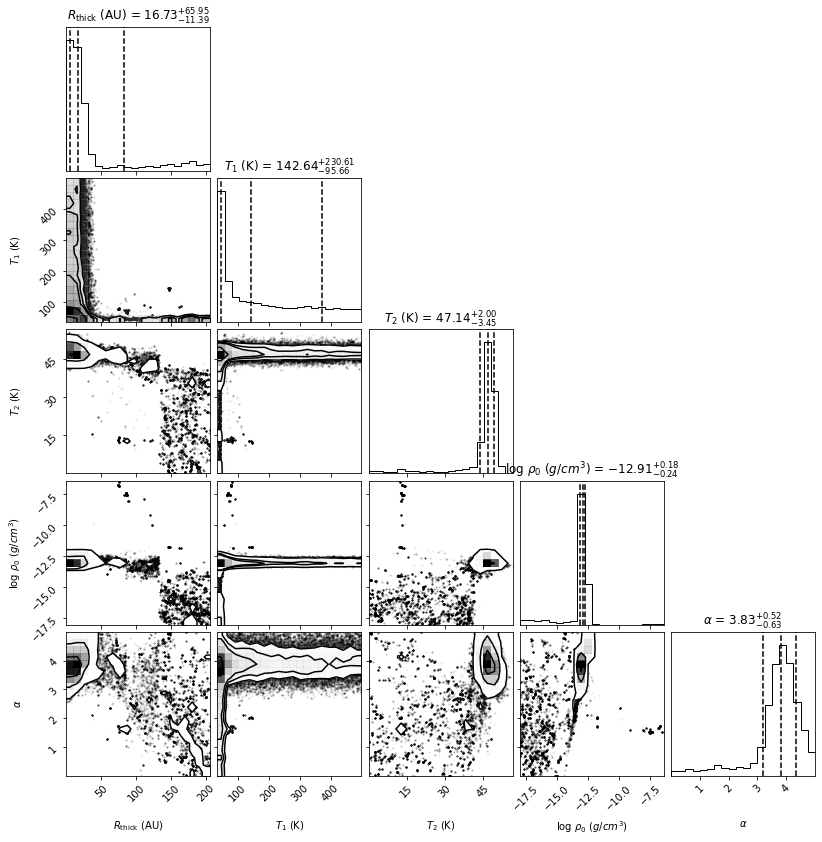

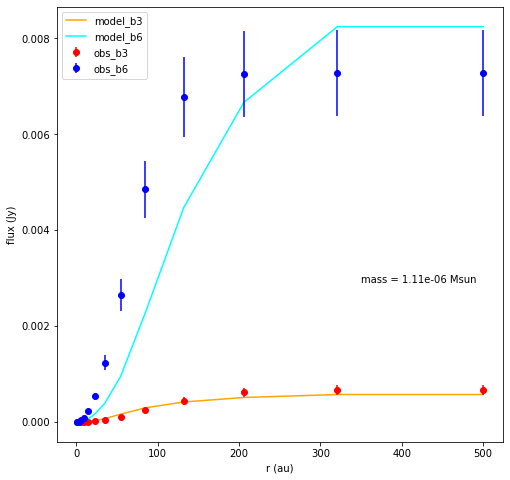

flux_apertures [7.16307751e-08 1.74044258e-07 4.22872657e-07 1.02738888e-06
 2.49574517e-06 6.06066316e-06 1.47057357e-05 3.56119610e-05
 8.58276458e-05 2.04476446e-04 4.73882586e-04 1.02974650e-03
 1.94356441e-03 2.83604404e-03 3.12427621e-03] [1.11640685e-05 2.71252015e-05 6.59021571e-05 1.60091548e-04
 3.88773414e-04 9.43372467e-04 2.28476175e-03 5.50794818e-03
 1.31307361e-02 3.04781723e-02 6.64646345e-02 1.26379775e-01
 1.86580763e-01 2.07180548e-01 2.08011600e-01]
348.32412637825206 227.2844652404475
spectral index 4.711042891346915
flux 0.0020729694756933177 0.12408639869796285
flux_apertures [5.81706707e-08 1.41334931e-07 3.43371247e-07 8.34070875e-07
 2.02515778e-06 4.91213264e-06 1.18850861e-05 2.85839263e-05
 6.77557456e-05 1.55162482e-04 3.28139628e-04 5.86077457e-04
 7.89084141e-04 8.31581622e-04 8.32207795e-04] [1.53576643e-06 3.73074445e-06 9.05998427e-06 2.19848383e-05
 5.32480001e-05 1.28382616e-04 3.06150842e-04 7.11122176e-04
 1.55330058e-03 2.96366847e-03 4.39941373

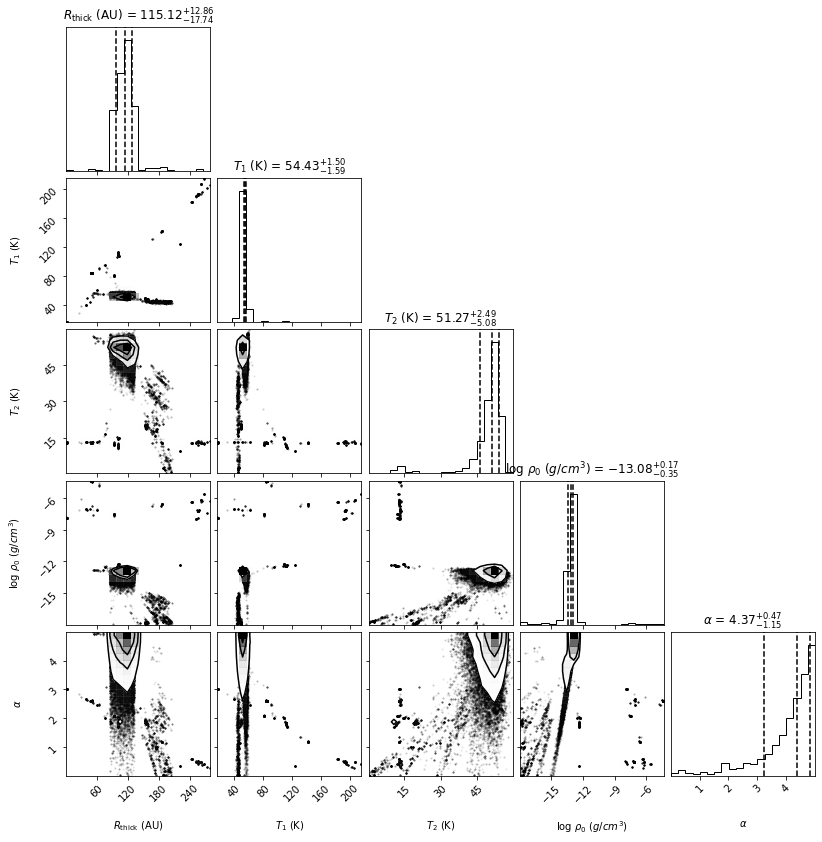

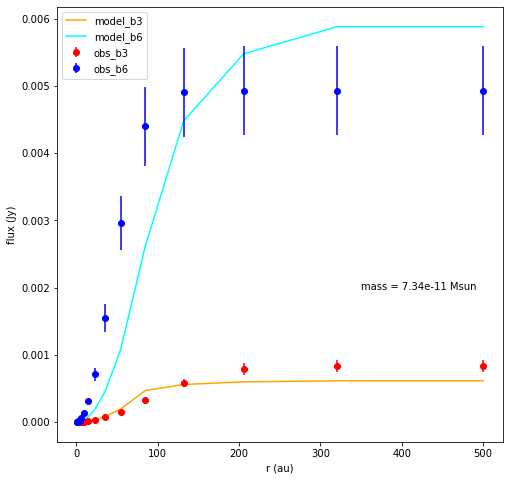

flux_apertures [1.36563484e-07 3.31806974e-07 8.06145134e-07 1.95832429e-06
 4.75575077e-06 1.15404055e-05 2.79522017e-05 6.73992517e-05
 1.60757531e-04 3.73582839e-04 8.16908944e-04 1.56223527e-03
 2.32765170e-03 2.60152196e-03 2.61360494e-03] [2.91092780e-06 7.07247484e-06 1.71819539e-05 4.17329734e-05
 1.01311070e-04 2.45628054e-04 5.93675616e-04 1.42414678e-03
 3.35512224e-03 7.57308770e-03 1.55075722e-02 2.60283245e-02
 3.24505419e-02 3.32646461e-02 3.32687395e-02]
230.35104684825234 178.006426752552
spectral index 2.85451346166689
flux 0.0020991947069285925 0.028673988865488113
Running burn-in...
Running production...
elapsed time,  2599.2035653591156
[ 3.49961985e-01  4.75702162e+02  2.04978159e+02 -1.37719271e+01
  1.47393610e+00]
envelope mass 0.00308158703643648 solMass
verbose on
0 1.0 0.3499619849971509
r, r_thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6
1.0 0.3499619849971509 1.3255745292870464e-07 Jy 8.884288281508198e-07 Jy 4.7014489133527

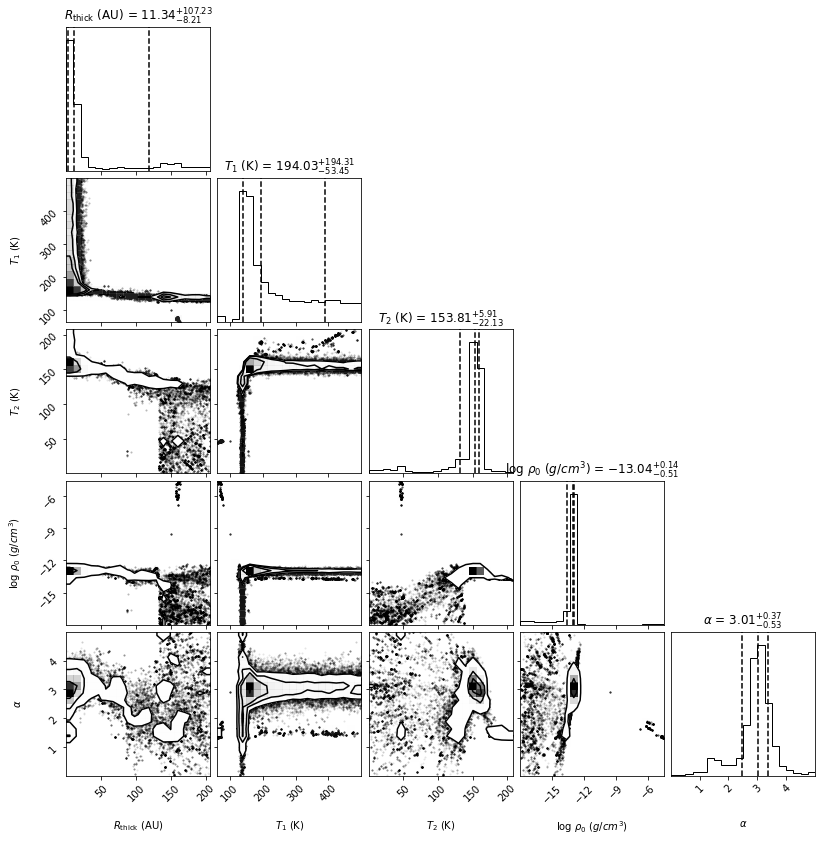

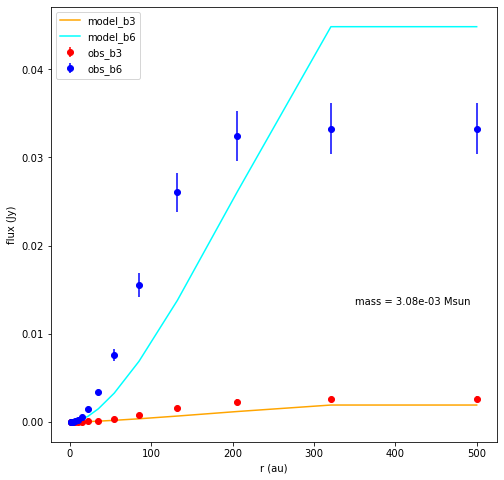

flux_apertures [5.40509881e-07 1.31314011e-06 3.18957732e-06 7.74368789e-06
 1.87784194e-05 4.54097127e-05 1.09064162e-04 2.57691383e-04
 5.85638182e-04 1.21752652e-03 2.10310108e-03 2.71206916e-03
 2.80965993e-03 2.81047577e-03 2.81047578e-03] [1.75346314e-06 4.25971471e-06 1.03453539e-05 2.51085171e-05
 6.08407995e-05 1.46847709e-04 3.51097174e-04 8.20593509e-04
 1.81824003e-03 3.57611946e-03 5.58329277e-03 6.47714483e-03
 6.53806814e-03 6.53814446e-03 6.53814446e-03]
120.06320949405654 101.66993369182045
spectral index 0.9473942562110295
flux 0.0019107592717923826 0.003249904952496175
flux_apertures [3.06044682e-07 7.43585273e-07 1.80653513e-06 4.38822005e-06
 1.06549518e-05 2.58452147e-05 6.25395385e-05 1.50444552e-04
 3.56817565e-04 8.18212669e-04 1.73558248e-03 3.11849039e-03
 4.23315107e-03 4.47783143e-03 4.48181257e-03] [1.75017647e-06 4.25237525e-06 1.03313350e-05 2.50969447e-05
 6.09450463e-05 1.47876553e-04 3.58091997e-04 8.62963525e-04
 2.05554947e-03 4.76172265e-03 1.03367

In [ ]:
import time
w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(w51n_b6_conv_flux)

w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265



w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_conv_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_conv_fits['flux']

w51e_b3_int_fluxerr = w51e_b3_flux_fits['flux_upperr'] - w51e_b3_flux_fits['flux_lowerr']
w51e_b6_int_fluxerr = w51e_b6_flux_conv_fits['flux_upperr'] - w51e_b6_flux_conv_fits['flux_lowerr']
w51n_b3_int_fluxerr = w51n_b3_flux_fits['flux_upperr'] - w51n_b3_flux_fits['flux_lowerr']
w51n_b6_int_fluxerr = w51n_b6_flux_conv_fits['flux_upperr'] - w51n_b6_flux_conv_fits['flux_lowerr']
rmax=500
num=15
rarr = np.logspace(0,np.log10(rmax),num=num)
labels = [r'$R_{\rm thick}$ (AU)', '$T_{1}$ (K)', '$T_{2}$ (K)', r'log $\rho_0$ $(g/cm^3)$',r'$\alpha$']
freqb3=92982346121.91989*u.Hz
freqb6=226691598706.70853*u.Hz
kappa_b3 = kappa(freqb3)
kappa_b6 = kappa(freqb6)
au_to_cm = (1*u.au).to(u.cm)
g_to_msun = (1*u.g).to(u.Msun)
dist = 5.41*u.kpc
r_0 = 100*u.au
temparr=[]
for i in range(len(w51e_b3_int_flux)):
    if any((w51e_b3_int_flux[i]<0, w51e_b6_int_flux[i]<0,
            ~np.isfinite(w51e_b3_int_flux[i]), ~np.isfinite(w51e_b6_int_flux[i]), 
            w51e_b3_major[i]<=0, w51e_b6_major[i]<=0)):
        continue
    start=time.time()
    nll = lambda *args: -lnlike(*args)
    initial = np.array([100, 80, 40, -14 ,2])
    ndim = len(initial)
    nwalkers=100
    niter=1000
    
    p0 = [np.array(initial) + [20,20,10,2,0.1] * np.random.randn(ndim) for i in range(nwalkers)]

    
    flux_b3 = flux_gaussian_multiple_apertures(w51e_b3_int_flux[i],w51e_b3_major[i], w51e_b3_minor[i], rarr)
    flux_b6 = flux_gaussian_multiple_apertures(w51e_b6_int_flux[i],w51e_b6_major[i], w51e_b6_minor[i], rarr)
    print('flux_apertures', flux_b3, flux_b6)
    print(w51e_b3_major[i],w51e_b6_major[i])
    spectral_index = np.log(flux_b3[-1]/flux_b6[-1])/np.log(freqb3/freqb6)
    print('spectral index',spectral_index )
    print('flux', w51e_b3_int_flux[i], w51e_b6_int_flux[i])
    if any((spectral_index>4, spectral_index<1.7)):
        temp = -99
        temparr.append(temp)
        continue
    
    data = (flux_b3, flux_b6, w51e_b3_int_fluxerr[i], w51e_b6_int_fluxerr[i], rarr)

    sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)
    print('elapsed time, ',time.time()-start)

    samples = sampler.flatchain
    print(samples[np.argmax(sampler.flatlnprobability)])
    theta_max  = samples[np.argmax(sampler.flatlnprobability)]
    alpha = theta_max[4]
    rho_0 = 10**theta_max[3]
   
    mass = get_mass(10**theta_max[3], theta_max[4], theta_max[0])
    print('envelope mass', mass)
    
    f1,f2 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, verbose=True )

    fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
    
    fig = plt.figure(figsize=(8,8))
    model_b3, model_b6 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, dist=dist )
    
    plt.plot(rarr, model_b3, c='orange', label='model_b3')
    plt.plot(rarr, model_b6, c='cyan', label='model_b6')
    plt.errorbar(rarr, flux_b3, yerr=np.ones(len(flux_b3))*w51e_b3_int_fluxerr[i]*flux_b3/np.max(flux_b3), fmt='o', c='r', label='obs_b3')
    plt.errorbar(rarr, flux_b6, yerr=np.ones(len(flux_b6))*w51e_b6_int_fluxerr[i]*flux_b6/np.max(flux_b6), fmt='o', c='b', label='obs_b6')
    #plt.text(350, np.max(flux_b6)*0.6, 'r_b6thick = %3.2e'%r_b6thick.value+' au')
    #plt.text(350, np.max(flux_b6)*0.5, 'r_b3thick = %3.2e'%r_b3thick.value+' au')
    plt.text(350, np.max(flux_b6)*0.4, 'mass = %3.2e'%mass.value+' Msun')

    plt.legend()
    plt.xlabel('r (au)')
    plt.ylabel('flux (Jy)')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    plt.close()
    
    opt_thick_mass = rho_0 * (theta_max[0]/r_0.value)**(-alpha) * (4* np.pi /3) * theta_max[0]**3 * au_to_cm.value **3 / g_to_msun.value
    temp_massweighted = (theta_max[1] * opt_thick_mass + theta_max[2] * mass.value) / (opt_thick_mass + mass.value)
    temparr.append(temp_massweighted)

np.savetxt('w51e_temp.dat', np.array(temparr), newline='\n', delimiter=' ')
    